In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv(r"../data/final/panel_final_combined_data_nolables.csv")

df.insert(0, 'status_inf', df.pop('status_inf'))

df = df.drop(columns=['conglome_t1', 'vivienda_t1','hogar_t1','codperso_t1','periodo','ocupinf_t1','ocupinf_t2','linea_t1'])

# Calcular el tiempo total de trabajo en terminos anuales
# Crear la nueva columna 'p513_calculada_t1' que combine años y meses
df['p513_calculada_t1'] = df['p513a1_t1'] + df['p513a2_t1'] / 12
df = df.drop(columns=['p513a1_t1', 'p513a2_t1'])

df

,status_inf,p207_t1,p208a_t1,p209_t1,p501_t1,p507_t1,p510_t1,p510a1_t1,p510b_t1,p511a_t1,...,ingexthd_t1,ingtrahd_t1,ingtexhd_t1,ingrenhd_t1,ingmo1hd_t1,inghog1d_t1,gashog1d_t1,pobreza_t1,estrsocial_t1,p513_calculada_t1
0,0,2,47,2,1,3,2.0,NaN,NaN,1.0,...,1209,0,0,0,59973.00,67037.000000,32513.843561,3,4.0,12.000000
1,1,1,57,1,1,2,NaN,2.0,1.0,NaN,...,0,0,0,0,37827.00,39858.443405,18009.005738,3,4.0,38.000000
2,0,1,29,6,1,3,2.0,NaN,NaN,1.0,...,3270,0,0,0,53946.00,59025.000000,31041.503760,3,4.0,4.250000
3,0,1,26,6,1,3,2.0,1.0,1.0,2.0,...,3270,0,0,0,53946.00,59025.000000,31041.503760,3,4.0,0.416667
4,0,1,67,2,1,2,NaN,2.0,2.0,NaN,...,0,420,0,8328,32102.00,44854.000000,28348.531784,3,5.0,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20036,1,1,61,2,1,2,NaN,2.0,2.0,NaN,...,0,0,0,26436,84921.00,99977.875000,44964.398438,3,3.0,17.000000
20037,0,1,56,2,1,4,6.0,1.0,1.0,1.0,...,28116,7811,0,0,188623.75,209964.750000,71848.789062,3,3.0,30.000000
20038,0,1,29,6,1,3,2.0,NaN,NaN,2.0,...,28116,7811,0,0,188623.75,209964.750000,71848.789062,3,3.0,2.000000
20039,0,1,31,2,1,4,5.0,1.0,1.0,2.0,...,0,1210,0,0,20262.00,25123.931641,13151.727539,3,6.0,0.250000


In [25]:
df_clean = df.dropna()
df_clean.shape

(0, 79)

In [34]:
# Lista de variables categóricas
categorical_columns_t1 = [
    'p207_t1', 'p209_t1', 'p501_t1', 'p507_t1', 'p510_t1', 'p510a1_t1', 'p510b_t1', 'p511a_t1', 'p512a_t1',
    'p514_t1', 'p519_t1', 'p521a_t1', 'p521c_t1', 'p524a2_t1', 'p528_t1', 'p530b_t1', 'p535_t1', 'p558c_t1',
    'p558d_t1', 'p300a_t1', 'p301a_t1', 'p302_t1', 'p307_t1', 'p313_t1', 'p314a_t1', 'p401f_t1', 'p401_t1',
    'p4021_t1', 'p4022_t1', 'p4023_t1', 'p4024_t1', 'p4025_t1', 'p4191_t1', 'p4192_t1', 'p4193_t1', 'p4194_t1',
    'p4195_t1', 'p4196_t1', 'p4197_t1', 'p4198_t1', 'p101_t1', 'p102_t1', 'p103_t1', 'p103a_t1', 'p104_t1',
    'p104a_t1', 'p105a_t1', 'p106b_t1', 'p107b1_t1', 'p110_t1', 'p110a1_t1', 'p111a_t1', 'p112a_t1', 'p1142_t1',
    'p1144_t1', 'estrsocial_t1', 'pobreza_t1'
]

# Filtrar el DataFrame para solo las variables categóricas
df_categoricas = df[categorical_columns_t1]
df_sin_categoricas = df.drop(columns=categorical_columns_t1)


In [35]:
print(df.shape)
print(df_categoricas.shape)
print(df_sin_categoricas.shape)
print("Valores posibles para la variable 'status_inf':", df['status_inf'].unique())


(20041, 79)
(20041, 57)
(20041, 22)
Valores posibles para la variable 'status_inf': [0 1]


In [44]:
# Paso 1: One-hot encoding para variables categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns_t1, dummy_na=True)


In [45]:
X = df_encoded.drop(columns=['status_inf'])
y = df_encoded['status_inf']


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [47]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)



c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:20:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

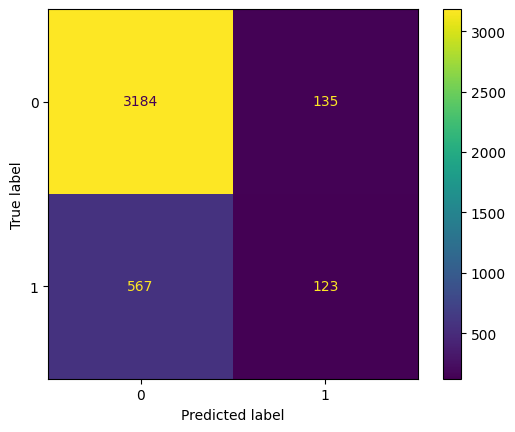

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

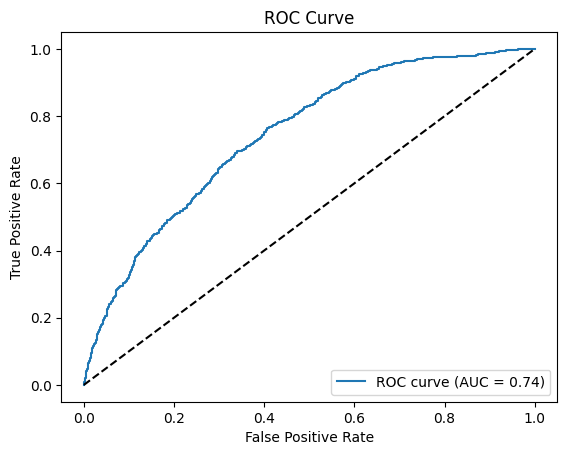

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

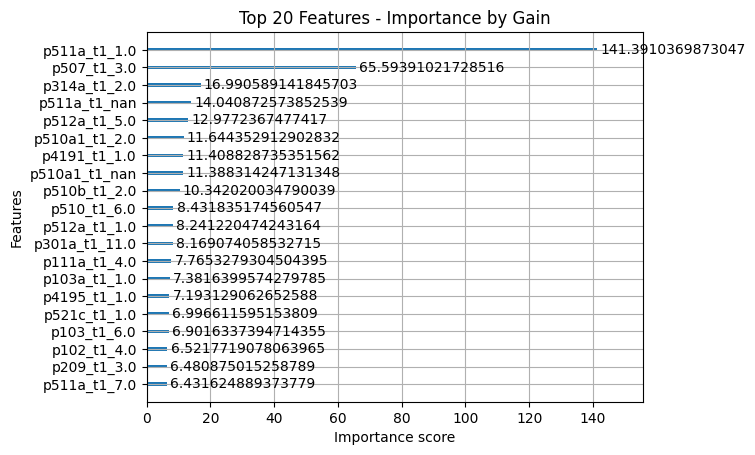

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Usamos el modelo ya entrenado
plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Features - Importance by Gain")
plt.show()